## Living Cost and Food Survey: Machine Learning Regression Analysis

This script contains the following:
    
#### 01. Importing Libraries and Data
#### 02. Clean the Data for Analysis
* Check for Missing Values and Duplicates
* Cleaning the required columns for the machine learning regression analysis
##### 'W_ultra_processed_food' column
##### 'W_unprocessed_food' column
##### 'W_disposable_income' column

#### 03. Data Preparation for Regression Analysis 
* Prep 1 - 'W_ultra_processed_food' and 'W_unprocessed_food'
* Prep 2 - 'W_ultra_processed_food' and 'W_disposable_income'

#### 04. Regression Analysis
* Analysis 1 - 'W_ultra_processed_food' and 'W_unprocessed_food'
##### Comparing how the regression fits the training set
* Analsyis 2 - 'W_ultra_processed_food' and 'W_disposable_income'
##### Comparing how the regression fits the training set

#### 05. Reflections on the Impact of Possible Data Bias
---

## 01. Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To display the charts in the notebook without the need to "call" them specifically.
%matplotlib inline

In [2]:
# Assign the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [3]:
# Use the os.path.join() function to import the lcf_analysis.pkl file as pandas a dataframe and view first fifteen rows
df_lcf_analysis = pd.read_pickle(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'lcf_analysis_regions.pkl'))
df_lcf_analysis.head(15)

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,...,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food,rW_total_food_cost,rW_ultra_processed_food,r%ultra_processed_food,rW_unprocessed_food,r%unprocessed_food
0,1,1,Index,January to March,173.270000,East,179.684359,1.0,173.270,173.2700,...,7.026438,554.833106,37.750485,0.711054,56.147382,1939.661948,617.777123,31.849732,459.560500,23.692814
1,2,5,Index,July to September,333.667857,North West,1117.340000,2.8,1117.340,934.2700,...,39.149384,789.311802,17.463803,2.114853,42.638686,1759.924158,551.273975,31.323735,416.637546,23.673608
2,3,2,Index,January to March,678.860000,North West,1269.120000,1.5,732.740,1018.2900,...,133.122488,750.798131,27.755326,4.935850,27.837721,1729.658686,548.335454,31.701946,419.067614,24.228342
3,4,3,Index,July to September,180.000000,South East,391.475289,1.6,288.000,288.0000,...,61.488466,189.774324,28.595960,7.838384,24.191919,2055.044167,615.104431,29.931446,484.539985,23.578081
4,5,3,Index,April to June,375.455000,North West,922.302564,2.0,911.700,750.9100,...,65.180202,863.439444,7.527209,2.498936,33.103302,1759.924158,551.273975,31.323735,416.637546,23.673608
5,6,4,Index,July to September,254.204000,South East,719.120000,2.5,719.120,635.5100,...,92.277452,1133.217217,9.429995,1.106466,13.588004,2055.044167,615.104431,29.931446,484.539985,23.578081
6,7,1,Index,July to September,430.716400,East,545.270577,1.0,499.770,430.7164,...,13.911332,35.473896,30.412497,4.393459,11.203320,1908.358848,561.560598,29.426363,431.970013,22.635681
7,8,1,Index,October to December,434.121200,South West,544.506146,1.0,523.950,434.1212,...,44.027604,389.002227,10.708968,5.497652,48.574047,1777.917498,544.943729,30.650676,432.899032,24.348657
8,9,2,Index,April to June,1004.068000,Wales,1863.292000,1.5,1863.292,1506.1020,...,211.472312,313.551775,26.801342,18.075936,26.801342,1683.241202,568.144770,33.753022,424.157640,25.198863
9,10,2,Index,April to June,858.526667,London,1726.290000,1.5,0.000,1287.7900,...,66.371239,661.261182,10.939538,0.937142,9.336812,2807.363772,737.556100,26.272196,668.777116,23.822246


In [4]:
# View the shape of the dataframe
df_lcf_analysis.shape

(26149, 48)

In [5]:
# View the columns in the dataframe
df_lcf_analysis.columns

Index(['unique_id', 'no_people', 'household_type', 'quarter',
       'OECD_disposable_income', 'region', 'total_income', 'OECD_scale',
       'gross_income', 'weekly_disposable_income', 'income_source',
       'adult_food_cost', 'child_food_cost', 'total_food_cost',
       'adult_total_expenditure', 'child_total_expenditure',
       'total_expenditure', 'eng_rural_urb', 'scot_rural_urb',
       'quarterly_weight', 'year', 'no_children', 'no_adult',
       'unprocessed_food', 'processed_food', 'ultra_processed_food',
       'no_households', 'W_OECD_disposable_income', 'W_total_income',
       'W_gross_income', 'W_disposable_income', 'W_adult_food_cost',
       'W_child_food_cost', 'W_total_food_cost', 'W_adult_total_expenditure',
       'W_child_total_expenditure', 'W_total_expenditure',
       'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food',
       '%unprocessed_food', '%processed_food', '%ultra_processed_food',
       'rW_total_food_cost', 'rW_ultra_processed_food',

---

## 02. Clean the Data for Analysis

### Check for Missing Values and Duplicates

In [6]:
# Check for missing values
df_lcf_analysis.isnull().sum()

unique_id                        0
no_people                        0
household_type                   0
quarter                          0
OECD_disposable_income           0
region                           0
total_income                     0
OECD_scale                       0
gross_income                     0
weekly_disposable_income         0
income_source                    0
adult_food_cost                  0
child_food_cost                  0
total_food_cost                  0
adult_total_expenditure          0
child_total_expenditure          0
total_expenditure                0
eng_rural_urb                 4788
scot_rural_urb               23081
quarterly_weight                 0
year                             0
no_children                      0
no_adult                         0
unprocessed_food                 0
processed_food                   0
ultra_processed_food             0
no_households                    0
W_OECD_disposable_income         0
W_total_income      

No missing values in the columns for the machine learning regression analysis.

In [7]:
# Check for duplicates
dups = df_lcf_analysis.duplicated()
dups.shape

(26149,)

No duplicates found.

### Cleaning the required columns for the machine learning regression analysis 

Based on the exploratory analysis the following columns were chosen for the maching learning regression analysis:  
* spending on ultra processed food and spending on unprocessed food (correlation coefficient 0.67)
* spending on ultra processed food and disposable income (correlation coefficient 0.56)

Although ultra processed food has a strong correlation with these variables, the data is very spread out and therefore a linear relationship is highly unlikely. The strongest correlation for ultra processed food is with total food cost (correlation coefficient 0.81), but the two variables are not independent of each other with ultra-processed foods contributing to the total food cost. 

#### 'W_ultra_processed_food' column

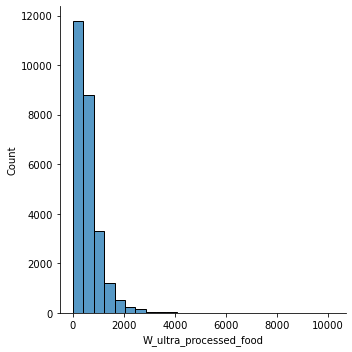

In [8]:
# Check for extreme values
sns.displot(df_lcf_analysis['W_ultra_processed_food'], bins=25) 

In [9]:
# check the mean, median and max values
df_lcf_analysis['W_ultra_processed_food'].describe()

count    26149.000000
mean       577.696675
std        504.391771
min          0.000000
25%        253.281650
50%        447.703155
75%        749.273826
max      10198.476554
Name: W_ultra_processed_food, dtype: float64

The column contains outliers. Remove values above 4000

In [10]:
# Clean the extreme values from the "W_ultra_processed_food" variable
df_lcf_analysis_reg = df_lcf_analysis.loc[df_lcf_analysis['W_ultra_processed_food'] <= 4000] 

In [11]:
# check the mean, median and max values in the new column
df_lcf_analysis_reg['W_ultra_processed_food'].describe()

count    26117.000000
mean       571.978782
std        474.171266
min          0.000000
25%        253.031923
50%        447.189869
75%        747.689388
max       3942.232892
Name: W_ultra_processed_food, dtype: float64

#### 'W_unprocessed_food' column

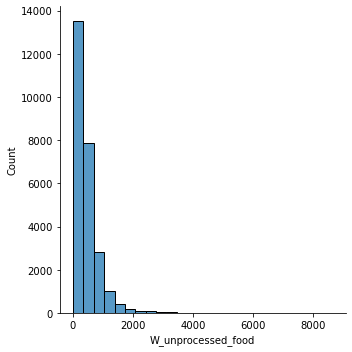

In [12]:
# Check for extreme values
sns.displot(df_lcf_analysis_reg['W_unprocessed_food'], bins=25) 

In [13]:
# check the mean, median and max values
df_lcf_analysis_reg['W_unprocessed_food'].describe()

count    26117.000000
mean       442.327168
std        423.101263
min          0.000000
25%        171.986864
50%        333.549049
75%        576.723004
max       8650.517599
Name: W_unprocessed_food, dtype: float64

The column contains outliers. Remove values above 4000

In [14]:
# Clean the extreme values from the "W_unprocessed_food" variable
df_lcf_analysis_reg1 = df_lcf_analysis_reg.loc[df_lcf_analysis_reg['W_unprocessed_food'] <= 4000] 

In [15]:
# check the mean, median and max values in the new column
df_lcf_analysis_reg1['W_unprocessed_food'].describe()

count    26099.000000
mean       439.154778
std        404.576290
min          0.000000
25%        171.813145
50%        333.314430
75%        575.895236
max       3998.965905
Name: W_unprocessed_food, dtype: float64

#### 'W_disposable_income' column

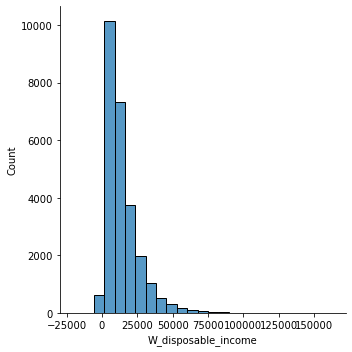

In [16]:
# Check for extreme values
sns.displot(df_lcf_analysis_reg['W_disposable_income'], bins=25) 

In [17]:
# check the mean, median and max values
df_lcf_analysis_reg['W_disposable_income'].describe()

count     26117.000000
mean      14146.239454
std       12007.088830
min      -20493.301791
25%        6055.772471
50%       10758.209940
75%       18383.791420
max      163239.936800
Name: W_disposable_income, dtype: float64

Remove the extreme values above 87500 and below -850

In [18]:
# Clean the extreme values from the "W_disposable_income" variable
df_lcf_analysis_reg2 = df_lcf_analysis_reg.loc[(df_lcf_analysis_reg['W_disposable_income'] >= -850) & (df_lcf_analysis_reg['W_disposable_income'] <= 87500)] 

In [19]:
# check the mean, median and max values in the new column
df_lcf_analysis_reg2['W_disposable_income'].describe()

count    26073.000000
mean     14059.086866
std      11572.459956
min       -748.273775
25%       6058.232432
50%      10753.092664
75%      18360.482811
max      86347.486880
Name: W_disposable_income, dtype: float64

___

## 03. Data Preparation for Regression Analysis 

### Prep 1 - 'W_ultra_processed_food' and 'W_unprocessed_food'

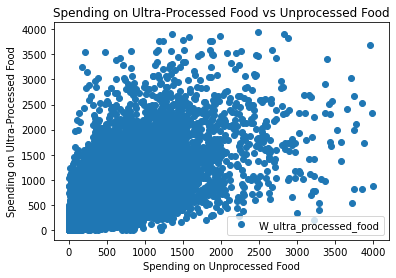

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_lcf_analysis_reg1.plot(x = 'W_unprocessed_food', y = 'W_ultra_processed_food', style = 'o') 
plt.title('Spending on Ultra-Processed Food vs Unprocessed Food')  
plt.xlabel('Spending on Unprocessed Food')  
plt.ylabel('Spending on Ultra-Processed Food')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_lcf_analysis_reg1['W_unprocessed_food'].values.reshape(-1,1)
y1 = df_lcf_analysis_reg1['W_ultra_processed_food'].values.reshape(-1,1)

In [22]:
X1

array([[373.03998839],
       [323.28356315],
       [748.5758959 ],
       ...,
       [566.48377469],
       [  0.        ],
       [702.94934545]])

In [23]:
y1

array([[554.83310603],
       [789.3118016 ],
       [750.79813138],
       ...,
       [191.0494299 ],
       [  0.        ],
       [761.46443669]])

In [24]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

### Prep 2 - 'W_ultra_processed_food' and 'W_disposable_income'

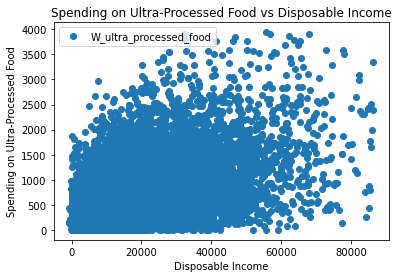

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_lcf_analysis_reg2.plot(x = 'W_disposable_income', y = 'W_ultra_processed_food', style = 'o') 
plt.title('Spending on Ultra-Processed Food vs Disposable Income')  
plt.xlabel('Disposable Income')  
plt.ylabel('Spending on Ultra-Processed Food')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df_lcf_analysis_reg2['W_disposable_income'].values.reshape(-1,1)
y2 = df_lcf_analysis_reg2['W_ultra_processed_food'].values.reshape(-1,1)

In [27]:
X2

array([[ 4427.16704034],
       [28135.45733992],
       [21551.23972387],
       ...,
       [ 7328.16038442],
       [51808.50360105],
       [10648.97835386]])

In [28]:
y2

array([[554.83310603],
       [789.3118016 ],
       [750.79813138],
       ...,
       [191.0494299 ],
       [  0.        ],
       [761.46443669]])

In [29]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

___

## 04. Regression Analysis

### Analysis 1 - 'W_ultra_processed_food' and 'W_unprocessed_food'

Hypothesis: If a housedhold spends more on unprocessed food, they also spend more on processed food.

In [30]:
# Create a regression object.
regression = LinearRegression()  

In [31]:
# Fit the regression object onto the training set.
regression.fit(X1_train, y1_train)

LinearRegression()

In [32]:
# Predict the values of y using X.
y1_predicted = regression.predict(X1_test)

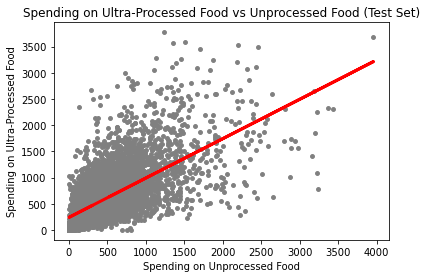

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plt.title('Spending on Ultra-Processed Food vs Unprocessed Food (Test Set)')  
plt.xlabel('Spending on Unprocessed Food')  
plt.ylabel('Spending on Ultra-Processed Food')  
plt.show()

**As I expected the line does not cover even half of the data points.**

In [34]:
# Create objects that contain the model summary statistics - MSE (mean square error) and R2 score
rmse = mean_squared_error(y1_test, y1_predicted) 
r2 = r2_score(y1_test, y1_predicted) 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.75200158]]
Mean squared error:  119683.42101978305
R2 score:  0.442746759374574


**The 'Slope' shows that the two variables have a positive relationship, as spending on ultra-processed food increases, so does spending on unprocessed food by a degree of 0.75. 
The 'MSE' is large indicating the regression line isn’t an accurate representation of the data and this can clearly be seen in the graph with most of the points not close to the line. 
The 'R2' score is 0.44 which means the model is not a good fit (values closer to 1 indicate a good fit).**

In [36]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1005.023144,639.729302
1,428.680997,712.879722
2,220.912055,716.564510
3,932.765900,575.445760
4,595.392002,399.665706
5,429.284321,400.009464
6,90.318103,289.526217
7,811.056941,664.594857
8,569.839253,685.726562
9,142.306276,361.825493


**There are huge differences between the actual and predicted values, which is not surprising given the spread of the data points**

#### Comparing how the regression fits the training set

In [37]:
# Predict.
y1_predicted_train = regression.predict(X1_train) 

In [38]:
# Create objects that contain the model summary statistics - MSE (mean square error) and R2 score
rmse = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.75200158]]
Mean squared error:  129493.12115112589
R2 score:  0.42306444280472777


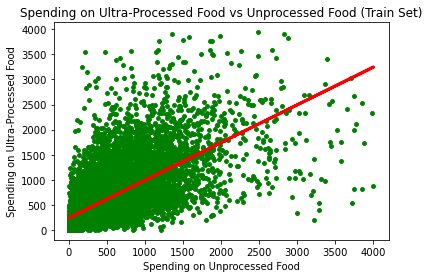

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='green', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plt.title('Spending on Ultra-Processed Food vs Unprocessed Food (Train Set)')  
plt.xlabel('Spending on Unprocessed Food')  
plt.ylabel('Spending on Ultra-Processed Food')  
plt.show()

**The model performs reasonably well and is not over fitted with similar values for the Slope: test - 0.75 and train - 0.75, MSE: test - 119683 and train - 129493, R2 score: test - 0.44 and train - 0.42.<br>
Removing further outliers would not improve the model**

### Analysis 2 - 'W_ultra_processed_food' and 'W_disposable_income'

Hypothesis: If a housedhold has a higher disposable income, they spend more on ultra-processed food.

In [41]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [42]:
# Fit the regression object onto the training set.
regression.fit(X2_train, y2_train)

LinearRegression()

In [43]:
# Predict the values of y using X.
y2_predicted = regression.predict(X2_test)

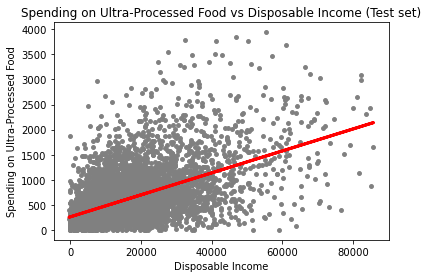

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Spending on Ultra-Processed Food vs Disposable Income (Test set)')
plot_test.xlabel('Disposable Income')
plot_test.ylabel('Spending on Ultra-Processed Food')
plot_test.show()

**As I expected the line does not cover even half of the data points.**

In [45]:
# Create objects that contain the model summary statistics - MSE (mean square error) and R2 score
rmse = mean_squared_error(y2_test, y2_predicted) 
r2 = r2_score(y2_test, y2_predicted) 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02190137]]
Mean squared error:  162500.0387567013
R2 score:  0.30385158572975635


**The 'Slope' shows that the two variables have a positive relationship, as spending on ultra-processed food increases, so does disposable income by a degree of 0.022. 
The 'MSE' is large indicating the regression line isn’t an accurate representation of the data and this can clearly be seen in the graph with most of the points not close to the line. 
The 'R2' score is 0.304 which means the model is not a good fit (values closer to 1 indicate a good fit).**

In [47]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,678.667328,725.671088
1,427.849651,583.019003
2,612.718125,783.337568
3,653.130961,346.828736
4,186.033232,431.212777
5,1617.911821,1133.785951
6,414.649524,416.277983
7,1819.424215,1613.038106
8,349.459422,1127.581129
9,189.174174,394.946574


**There are huge differences between the actual and predicted values, which is not surprising given the spread of the data points**

#### Comparing how the regression fits the training set

In [48]:
# Predict.
y2_predicted_train = regression.predict(X2_train) 

In [49]:
# Create objects that contain the model summary statistics - MSE (mean square error) and R2 score
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2 = r2_score(y2_train, y2_predicted_train)

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02190137]]
Mean squared error:  153371.19022978298
R2 score:  0.2914183863114268


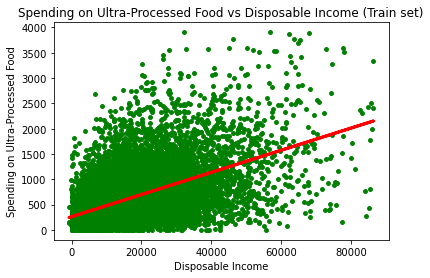

In [51]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('Spending on Ultra-Processed Food vs Disposable Income (Train set)')
plot_test.xlabel('Disposable Income')
plot_test.ylabel('Spending on Ultra-Processed Food')
plot_test.show()

**The model performs reasonably well and is not over fitted with similar values for the Slope: test - 0.022 and train - 0.022, MSE: test - 162500  and train - 153371, R2 score:  test - 0.304 and train - 0.291.<br>
Removing further outliers would not improve the model**

---

## 05. Reflections on the Impact of Possible Data Bias

* Both data sets for analysis contained 26k data points which should help to eliminate bias when the data set is split into the training and test set. The survey may not acurately represent the variation between households and excludes food costs on items consumed outside the home. 
* The two variables 'W_unprocessed_food' and 'W_ultra_processed_food' are closely related and may not be truly independent. People with less disposable income may have to spend it all on food and will therefore have to choose between the three food groups unprocessed, processed and ultra-processed. If they spend more on ultra-processed food then this will leave less for unprocessed food and vice versa. As the disposable income increases this becomes less of a problem.